In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import lvpyio as lv
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
random.seed=42

In [2]:
Nx,Ny = 100, 200
SimDomain=np.zeros((Nx,Ny))

#Adding a gaussian profile.
def Gaussian(pos,mu,Params):
    x,y=pos
    x0,y0=mu
    A,sigma=Params

    return(A*np.exp(-((x-x0)**2+(y-y0)**2)/(2*sigma**2)))

NGauss=100
GaussParams=(1,1)
positionLabel=np.zeros((2,NGauss))
print(Gaussian((1,0),(0,0),GaussParams))

def AddGaussians(SimDomain,NGauss):
    Nx=len(SimDomain[:,0])
    Ny=len(SimDomain[0,:])
    #print(Nx,Ny)
    for n in range(NGauss):
        positionLabel[:,n] = (random.randint(0, Nx),random.randint(0, Ny))

        #print(random_pos)
        for i in range(Nx):
            for j in range(Ny):
                SimDomain[i,j]+=Gaussian((i,j),positionLabel[:,n],GaussParams)

AddGaussians(SimDomain,NGauss)

0.6065306597126334


In [3]:

Nx, Ny = 100, 200
SimDomain = np.zeros((Nx, Ny))

# Adding a gaussian profile.
def Gaussian(pos, mu, Params):
    x, y = pos
    x0, y0 = mu
    A, sigma = Params
    return A * np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

NGauss = 100
GaussParams = (1, 1)
positionLabel = np.zeros((2, NGauss))

# Generate random positions for Gaussians
positionLabel[0, :] = np.random.randint(0, Nx, NGauss)
positionLabel[1, :] = np.random.randint(0, Ny, NGauss)

# Create a grid of x and y coordinates
x = np.arange(Nx)
y = np.arange(Ny)
x, y = np.meshgrid(x, y)

print(np.shape(SimDomain),np.shape(x),np.shape(y))
# Calculate the Gaussian profiles for all positions at once and add them to SimDomain
for n in range(NGauss):
    SimDomain += np.transpose(Gaussian((x, y), positionLabel[:, n], GaussParams))

# SimDomain now contains the sum of all Gaussian profiles
#Now let's add noise
# Define the standard deviation of the noise
noise_stddev = 0.1
noise_amp    = 2

# Generate random noise with the same shape as the matrix
noise = np.random.normal(scale=noise_stddev, size=SimDomain.shape)

# Add the noise to the matrix
SimDomain = SimDomain + noise_amp*noise


(100, 200) (200, 100) (200, 100)


[[ 43.  47.   1.  92.  93.  16.  35.  13.  14.  28.  46.  70.  69.  73.
   31.  55.  55.  11.  67.  58.   5.  68.  14.   6.   4.  85.   0.  10.
   73.  35.  37.  30.  44.  90.  61.  27.  22.  74.  14.  62.  88.  20.
   41.  14.   5.  27.  49.  96.  98.  55.  46.   2.   4.  45.  77.  66.
   97.  77.   2.   5.  56.  65.  63.  36.  99.  32.  19.  90.  48.  39.
   65.  65.  24.  51.  62.  20.  46.  71.  19.  14.  42.  69.  71.  23.
   85.  12.  17.  93.  47.  83.   6.  30.  49.  38.  66.  60.   7.  76.
   39.  66.]
 [ 78.  60.  59.  92.  64. 105.  51. 168. 183.  23. 104. 168.  86.  42.
   86.   0. 193. 104.  24. 177. 192. 159.  37.  86. 113. 164. 141.  21.
    3.  59.  96. 157. 182. 134.  45.   4. 122. 189.  31.  22.  42. 101.
   59.  90. 135.  73. 139. 181.  31.  88. 136.   8. 192.  49. 190. 174.
   73.  90.  34.  98.   4.  81. 160. 120. 198. 133. 176. 132.  56.  19.
   40. 145. 120.  55.  15.  93. 116. 173.  81.  97.  28.  54. 153. 116.
    8. 176.   2.  99. 193. 124. 189. 121. 124.  74.

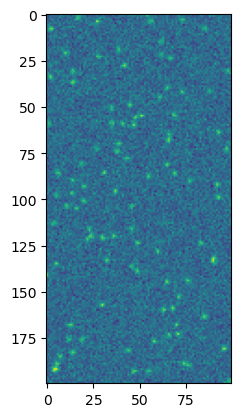

In [4]:
plt.imshow(np.transpose(SimDomain))

#plt.scatter(positionLabel[0, :], positionLabel[1, :], facecolors='none', edgecolors='r')
print(positionLabel)

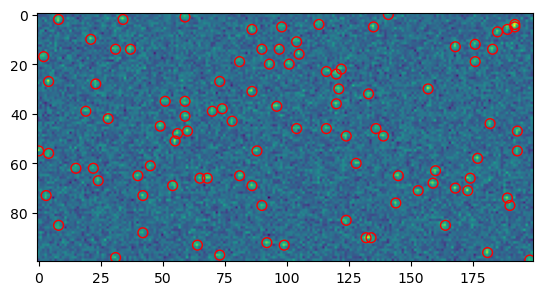

In [5]:
plt.imshow((SimDomain))
plt.scatter(positionLabel[1, :], positionLabel[0, :], s=50, facecolors='none', edgecolors='r')


In [35]:
Dir_NoPart = r'C:\Users\s174006\OneDrive - Danmarks Tekniske Universitet\Deep Learning Turbulence Project\ML_project_data\500img_noParticles\ImgPreproc'
save_dir = r"C:\Users\s174006\OneDrive - Danmarks Tekniske Universitet\Deep Learning Turbulence Project"

frame_number = 1
def load_frame(frame_number, camera_number=0):
    buffer = lv.read_buffer(Dir_NoPart +'/' + f"B{str(frame_number+1).zfill(5)}.im7")
    image = buffer[camera_number].as_masked_array().data
    return image

CamData = np.zeros((100,4))

#for i in range(10):
#    Cam1Data = np.append(Cam1Data,np.ravel(load_frame(i, camera_number=0)))
    
for i in range(500):
    for camN in range(4):
        tempdata = np.ravel(load_frame(i, camera_number=camN))
        for val in np.unique(tempdata).astype(int):
            #print(val)
            CamData[val,camN] = CamData[val,camN] + np.sum(tempdata==val)

#dataMatrix= load_frame(frame_number, camera_number=3)

#plt.imshow(dataMatrix)

RuntimeError: Invalid header.

In [114]:
CamDataNormalized=np.zeros(np.shape(CamData))
CamDataNormalizedCumalative=np.zeros(np.shape(CamData))
for i in range(4):
    CamDataNormalized[:,i]=CamData[:,i]/np.sum(CamData[:,i])
    CamDataNormalizedCumalative[:,i] = np.cumsum(CamDataNormalized[:,i])
def rdNoise(CamDataNormalizedCumalative,Shape):
    if isinstance(Shape, int):
        rdNumb=np.searchsorted(CamDataNormalizedCumalative[:,0], np.random.uniform(0, 1, size=Shape))
        return(rdNumb)
    else:
        Sizelength=Shape[0]*Shape[1]
        rdNumb=np.searchsorted(CamDataNormalizedCumalative[:,0], np.random.uniform(0, 1, size=Sizelength))
        rdNumb=np.reshape(rdNumb,Shape)
        return(rdNumb)
print(rdNoise(CamDataNormalizedCumalative,(100,4)))

[[ 1  0  3  0]
 [ 0  1  3  8]
 [ 4  0 13  0]
 [ 0  3 11  0]
 [ 7  0  0  0]
 [ 5  0  0  0]
 [ 5  0 12  6]
 [ 8  0  1  0]
 [ 9  0  0  0]
 [ 0  0  0  2]
 [ 0  8  4  0]
 [ 5  0  0  0]
 [ 0  5  0  4]
 [ 0  0  0  0]
 [ 8  0  2  0]
 [ 6  0  2  0]
 [ 0  0  0  4]
 [ 0  0  0  2]
 [ 0  0  6  0]
 [ 0  0  0  0]
 [11  0  1  0]
 [ 0  1  2  0]
 [ 0  6  7  2]
 [ 9  0 14  0]
 [10  0  0  0]
 [ 0  0  0  7]
 [ 0  0  4  3]
 [ 0 10  0  3]
 [ 0  0  0  2]
 [ 0  0  2  0]
 [15  0  0  0]
 [ 1  0  0  0]
 [ 3  0  0  0]
 [ 0  1  0  0]
 [ 0  0 11  4]
 [ 0  0  8  0]
 [ 0  0  0  0]
 [ 7 11  0  7]
 [ 0  0  0 12]
 [ 0  0  0  0]
 [ 3 15  0  0]
 [ 0  0  1  1]
 [ 2  0  1  0]
 [16  3  1  0]
 [ 0  0  0  7]
 [ 0  0  0  0]
 [ 0 14  5  0]
 [ 0  0  3  4]
 [ 0  3  0  5]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 3  0  0  6]
 [16 10  0  0]
 [ 0  1  0  0]
 [ 0  0  0  5]
 [ 0  0  0 11]
 [ 0  0  0  0]
 [ 0  2  0  0]
 [ 0  0  5  0]
 [18  0  0  0]
 [ 1  0  0  3]
 [ 8  0  1  0]
 [ 2  0  7  0]
 [ 0  0  0  0]
 [ 4  1  0  0]
 [ 0  0  1  0]
 [ 0  0  3

In [99]:
CamDataNormalized=np.zeros(np.shape(CamData))
print(np.shape(CamDataNormalized),np.size(CamDataNormalized))
Test=np.zeros(400)
Test=np.reshape(Test,(100,4))
print(np.shape(Test))

(100, 4) 400
(100, 4)


In [90]:
print(CamDataNormalized[:,0],CamDataNormalizedCumalative[:,0])

[6.60835523e-01 4.57615347e-02 4.25755410e-02 3.89507185e-02
 3.49656831e-02 3.09645369e-02 2.69254332e-02 2.31343815e-02
 1.95383117e-02 1.63040198e-02 1.34383665e-02 1.09814502e-02
 8.89160301e-03 7.13492779e-03 5.53939378e-03 4.24561649e-03
 3.09677934e-03 2.18374742e-03 1.51195647e-03 1.03925977e-03
 6.94644982e-04 4.62550145e-04 3.07285036e-04 1.94873486e-04
 1.24290224e-04 7.85234550e-05 4.78308584e-05 2.91795336e-05
 1.75244316e-05 1.04694929e-05 5.91901227e-06 3.57037711e-06
 1.92859080e-06 1.21496704e-06 5.91675396e-07 3.34228850e-07
 1.98730667e-07 1.12915152e-07 7.45240003e-08 3.38745456e-08
 2.70996365e-08 9.03321216e-09 0.00000000e+00 1.80664243e-08
 6.77490912e-09 0.00000000e+00 0.00000000e+00 2.25830304e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.25830304e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [78]:
test=rdNoise(CamDataNormalizedCumalative,100000000)
#test_norm=test[:]/np.sum(test[:])
print(test_norm)

[0.00000000e+00 0.00000000e+00 5.14965967e-08 ... 4.11972773e-07
 0.00000000e+00 0.00000000e+00]


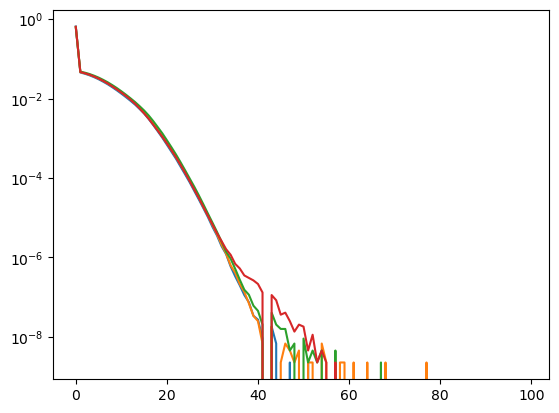

In [76]:
plt.plot(CamDataNormalized)
#plt.plot(test_norm,'k-')
plt.yscale('log')
plt.show()


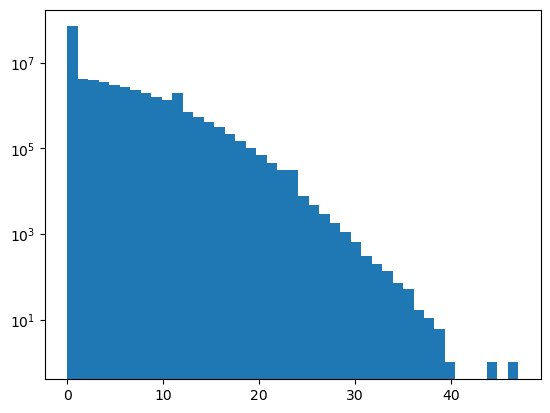

In [88]:
#plt.hist(Cam1Data, bins=len(np.unique(Cam1Data)))
test = rdNoise(CamDataNormalizedCumalative,100000000)
plt.hist(test, bins=len(np.unique(test)))
plt.yscale('log')
plt.show()


In [17]:
def rdNoise(CamDataNormalizedCumalative,Shape):
    if isinstance(Shape, int):
        rdNumb=np.searchsorted(CamDataNormalizedCumalative[:,0], np.random.uniform(0, 1, size=Shape))
        return(rdNumb)
    else:
        Sizelength=Shape[0]*Shape[1]
        rdNumb=np.searchsorted(CamDataNormalizedCumalative[:,0], np.random.uniform(0, 1, size=Sizelength))
        rdNumb=np.reshape(rdNumb,Shape)
        return(rdNumb)
    
def rdNoise(CamDataNormalizedCumalative, Shape):
    if isinstance(Shape, int):
        rdNumb = torch.searchsorted(CamDataNormalizedCumalative[:, 0], torch.rand(size=(Shape,)))
        return rdNumb
    else:
        Sizelength = Shape[0] * Shape[1]
        rdNumb = torch.searchsorted(CamDataNormalizedCumalative[:, 0], torch.rand(size=(Sizelength,)))
        rdNumb = rdNumb.reshape(Shape)
        return rdNumb

def gaussian(pos, mu, params):
    x, y = pos
    x0, y0 = mu
    A, sigma = params
    return A * torch.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

def generate_images(num_images, x_dim, y_dim, num_gaussians=100, gauss_params=(1, 1), noise_stddev=0.1):
    dataset = []
    images = []
    positions_list = []
    gauss_masks = []
    for _ in range(num_images):
        sim_domain = torch.zeros((x_dim, y_dim))
        positions = torch.zeros((2, num_gaussians))
        positions[0, :] = torch.randint(0, x_dim, (num_gaussians,))
        positions[1, :] = torch.randint(0, y_dim, (num_gaussians,))
        x = torch.arange(x_dim)
        y = torch.arange(y_dim)
        x, y = torch.meshgrid(x, y)

        for n in range(num_gaussians):
            sim_domain += gaussian((x, y), positions[:, n], gauss_params).t()

        # Store the images and masks as tensors with 1 channel
        noise = torch.normal(mean=0., std=noise_stddev, size=sim_domain.shape)
        



        # Store the images and masks as tensors with 1 channel
        dataset.append((sim_domain.unsqueeze(0) + 1.9*noise,sim_domain.unsqueeze(0)))

    return dataset

[2. 0. 6. 0. 1. 0. 0. 2. 0. 0.]


In [120]:
def rdNoise(CamDataNormalizedCumalative, Shape):
    if isinstance(Shape, int):
        rdNumb = torch.searchsorted(CamDataNormalizedCumalative[:, 0], torch.rand(size=(Shape,)))
        return rdNumb
    else:
        Sizelength = Shape[0] * Shape[1]
        rdNumb = torch.searchsorted(CamDataNormalizedCumalative[:, 0], torch.rand(size=(Sizelength,)))
        rdNumb = rdNumb.reshape(Shape)
        return rdNumb
print(torch.rand(size=(2,)))

tensor([0.1806, 0.1621])


In [ ]:
def rdNoise(CamDataNormalizedCumalative,Shape):
    if isinstance(Shape, int):
        rdNumb=np.searchsorted(CamDataNormalizedCumalative[:,0], np.random.uniform(0, 1, size=Shape))
        return(rdNumb)
    else:
        Sizelength=Shape[0]*Shape[1]
        rdNumb=np.searchsorted(CamDataNormalizedCumalative[:,0], np.random.uniform(0, 1, size=Sizelength))
        rdNumb=np.reshape(rdNumb,Shape)
        return(rdNumb)
    

In [122]:
import numpy as np

np.save('CamDataNormCumalative.npy', CamDataNormalizedCumalative)


In [123]:
import numpy as np

CamDataNormalizedCumalative = np.load('CamDataNormalizedCumalative.npy')


In [2]:
CamDataNormalizedCumalative = torch.from_numpy(np.load('CamDataNormalizedCumalative.npy'))

def rdNoise(CamDataNormalizedCumalative, Shape):
    if isinstance(Shape, int):
        rdNumb = torch.searchsorted(CamDataNormalizedCumalative[:, 0], torch.rand(size=(Shape,)))
        return rdNumb
    else:
        Sizelength = Shape[0] * Shape[1]
        rdNumb = torch.searchsorted(CamDataNormalizedCumalative[:, 0], torch.rand(size=(Sizelength,)))
        rdNumb = rdNumb.reshape(Shape)
        return rdNumb

def gaussian(pos, mu, params):
    x, y = pos
    x0, y0 = mu
    A, sigma = params
    return A * torch.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

def generate_images(num_images=5, x_dim=100, y_dim=100, num_gaussians=100, gauss_params=(60, 1), meanflow=15):
    dataset = []
    images = []
    positions_list = []
    gauss_masks = []
    flowrate = meanflow + max(min(np.random.normal(0, 1), 2), -2)
    Angle = np.random.uniform(0, 2 * np.pi)
    flowX = flowrate * np.cos(Angle)
    flowY = flowrate * np.sin(Angle)
    positions = torch.zeros((5, 2, num_gaussians))
    positions[0, 0, :] = torch.rand(num_gaussians) * (x_dim+meanflow*(num_images+1))-meanflow*(num_images+1)/2
    positions[0, 1, :] = torch.rand(num_gaussians) * (y_dim+meanflow*(num_images+1))-meanflow*(num_images+1)/2
    sim_domain_plustime = torch.zeros((num_images ,x_dim, y_dim ))
    Label_domain = torch.zeros((x_dim, y_dim ))
    for i in range(num_images):
        sim_domain = torch.zeros((x_dim, y_dim))
        #positions = torch.zeros((2, num_gaussians))
        positions[i, 0, :] = positions[0, 0, :]+flowX*i
        positions[i, 1, :] = positions[0, 1, :]+flowY*i
        #print(positions)
        x = torch.arange(x_dim)
        y = torch.arange(y_dim)
        x, y = torch.meshgrid(x, y)

        for n in range(num_gaussians):
            gauss_paramsrnd = (gauss_params[0] + max(np.random.normal(0, 30), -60), gauss_params[1]+ max(np.random.normal(0, 0.5), -1))
            sim_domain += gaussian((x, y), positions[i, :, n], gauss_params).t()

        # Store the images and masks as tensors with 1 channel
        #noise = torch.normal(mean=0., std=noise_stddev, size=sim_domain.shape)
        noise = rdNoise(CamDataNormalizedCumalative, sim_domain.shape)
        



        # Store the images and masks as tensors with 1 channel
        sim_domain_plustime[i,:,:] = sim_domain.unsqueeze(0) + 1.0*noise
        if i == round(num_images/2):
            print(i)
            Label_domain = sim_domain.unsqueeze(0)
            threshold = 20
            binary_mask = (sim_domain >= threshold).float()
            print(binary_mask)
        #sim_domain.unsqueeze(0)
        #positions_list.append(positions)
    #print(positions_list)
    dataset.append((sim_domain_plustime,binary_mask))
    return dataset
#print(CamDataNormalizedCumalative)

In [110]:
for i in range(25):
    print(60 + max(np.random.normal(0, 30), -50))


62.31257799844937
14.47844867301606
105.92190890123142
67.33033592279615
28.890094199752
79.36294736420895
67.3063752220733
80.87849759972465
59.460217933390865
101.64187376550599
18.094855287539062
70.89500342521286
32.57096279765768
87.56316358515451
102.0180016179851
66.36508654956275
59.237797153814405
37.990746809708924
19.663679484014565
92.57434102033073
29.969146827781884
72.43412565540108
38.82691805813727
74.36232479090278
34.7338793391205


c:\Users\s174006\AppData\Local\anaconda3\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
C:\Users\s174006\AppData\Local\Temp\ipykernel_7724\4155229545.py:9: UserWarning: torch.searchsorted(): boundary tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous boundary tensor if possible. This message will only appear once per program. (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\aten\src\ATen/native/BucketizationUtils.h:41.)
  rdNumb = torch.searchsorted(CamDataNormalizedCumalative[:, 0], torch.rand(size=(Sizelength,)))


2
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


C:\Users\s174006\AppData\Local\Temp\ipykernel_7724\4166370886.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


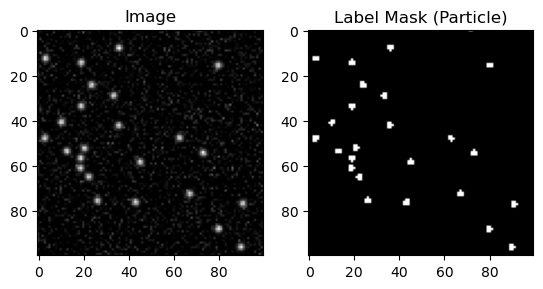

In [3]:
# Visualize an image and its corresponding label mask
def visualize_image(image, label):
    plt.figure()
    plt.title("Particle Detection")
    plt.subplot(1, 2, 1)
    plt.imshow(image[2].numpy(), cmap='gray')
    plt.title("Image")
    plt.subplot(1, 2, 2)
    plt.imshow(label.numpy(), cmap='gray')
    plt.title("Label Mask (Particle)")

# Create and visualize the dataset
#dataset = create_synthetic_dataset(num_samples=2)
dataset = generate_images(5, 100, 100)
image, label = dataset[0]
visualize_image(image, label)
# print the type of dataset
#print(dataset[0][1].shape)
#print the range of values in the image
#print(torch.max(dataset[0][0]))
#print(torch.min(dataset[0][0]))

plt.show()


In [113]:
#print(generate_images(3,25,25, num_gaussians=10, gauss_params=(50, 1))[0][0].shape)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
class CustomDataset(Dataset):
    def __init__(self, root, transform=None):
        pass

    def __len__(self):
        return 1000 # index by middle image, remove 2 images from start and end

    def __getitem__(self, idx):
        # Generate your data here
        # For example, let's generate a random tensor as data

        


        return data, labels
